## 피마인디언 당뇨병 사례

In [2]:
import numpy as np
import pandas as pd 
df = pd.read_csv('../dataset/pima-indians-diabetes.csv',
                 names = ["pregnant", "plasma", "pressure", "thickness",  
                 "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[['pregnant', 'class']].head(10)

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
5,5,0
6,3,1
7,10,0
8,2,1
9,8,1


In [7]:
# 임신 횟수와 당뇨병 발병 확률
df[['pregnant','class']].groupby(['pregnant'], 
    as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

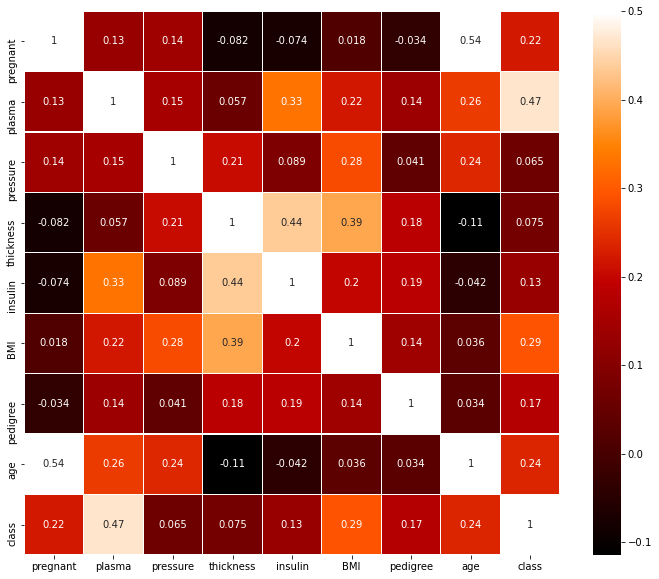

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, 
            linecolor='white', annot=True)
plt.show()

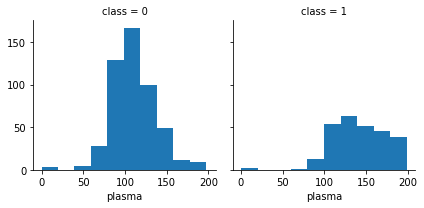

In [11]:
# 공복혈당(plasma)과 당뇨병과의 관계
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

## Logistic Regression by Deep Learning

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# seed 값 생성
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
# 데이터 로드
dataset = np.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [16]:
# 80% Train set, 20% Test set으로 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=seed)

In [17]:
# 딥러닝 모델 설정
model = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
# 모델 실행
model.fit(x_train, y_train, validation_split=0.2, epochs=200, 
          batch_size=50)

Train on 491 samples, validate on 123 samples
Epoch 1/200
491/491 [==============================] - 0s 695us/sample - loss: 17.2565 - accuracy: 0.3625 - val_loss: 15.8028 - val_accuracy: 0.2927
Epoch 2/200
491/491 [==============================] - 0s 26us/sample - loss: 12.6160 - accuracy: 0.3625 - val_loss: 10.8977 - val_accuracy: 0.2927
Epoch 3/200
491/491 [==============================] - 0s 24us/sample - loss: 8.1447 - accuracy: 0.3931 - val_loss: 7.4381 - val_accuracy: 0.3008
Epoch 4/200
491/491 [==============================] - 0s 26us/sample - loss: 6.4783 - accuracy: 0.4155 - val_loss: 6.4434 - val_accuracy: 0.3821
Epoch 5/200
491/491 [==============================] - 0s 26us/sample - loss: 5.3409 - accuracy: 0.4399 - val_loss: 4.9575 - val_accuracy: 0.3821
Epoch 6/200
491/491 [==============================] - 0s 26us/sample - loss: 4.0814 - accuracy: 0.4338 - val_loss: 3.5436 - val_accuracy: 0.3821
Epoch 7/200
491/491 [==============================] - 0s 28us/sample - l

491/491 [==============================] - 0s 26us/sample - loss: 0.6783 - accuracy: 0.6538 - val_loss: 0.7152 - val_accuracy: 0.6911
Epoch 57/200
491/491 [==============================] - 0s 26us/sample - loss: 0.6781 - accuracy: 0.6762 - val_loss: 0.7346 - val_accuracy: 0.6911
Epoch 58/200
491/491 [==============================] - 0s 24us/sample - loss: 0.6600 - accuracy: 0.6640 - val_loss: 0.7605 - val_accuracy: 0.6992
Epoch 59/200
491/491 [==============================] - 0s 26us/sample - loss: 0.6611 - accuracy: 0.6884 - val_loss: 0.7456 - val_accuracy: 0.7154
Epoch 60/200
491/491 [==============================] - 0s 28us/sample - loss: 0.6633 - accuracy: 0.6741 - val_loss: 0.7133 - val_accuracy: 0.6911
Epoch 61/200
491/491 [==============================] - 0s 28us/sample - loss: 0.6564 - accuracy: 0.6660 - val_loss: 0.7283 - val_accuracy: 0.6423
Epoch 62/200
491/491 [==============================] - 0s 26us/sample - loss: 0.6586 - accuracy: 0.6721 - val_loss: 0.7099 - val_a

491/491 [==============================] - 0s 28us/sample - loss: 0.5922 - accuracy: 0.7067 - val_loss: 0.6973 - val_accuracy: 0.7073
Epoch 112/200
491/491 [==============================] - 0s 30us/sample - loss: 0.5889 - accuracy: 0.7169 - val_loss: 0.7013 - val_accuracy: 0.6992
Epoch 113/200
491/491 [==============================] - 0s 30us/sample - loss: 0.5851 - accuracy: 0.7088 - val_loss: 0.6911 - val_accuracy: 0.7317
Epoch 114/200
491/491 [==============================] - 0s 28us/sample - loss: 0.5885 - accuracy: 0.7149 - val_loss: 0.7011 - val_accuracy: 0.7073
Epoch 115/200
491/491 [==============================] - 0s 28us/sample - loss: 0.5836 - accuracy: 0.7088 - val_loss: 0.7010 - val_accuracy: 0.6992
Epoch 116/200
491/491 [==============================] - 0s 30us/sample - loss: 0.5821 - accuracy: 0.7189 - val_loss: 0.6923 - val_accuracy: 0.7236
Epoch 117/200
491/491 [==============================] - 0s 26us/sample - loss: 0.6014 - accuracy: 0.6986 - val_loss: 0.7178 -

Epoch 166/200
491/491 [==============================] - 0s 28us/sample - loss: 0.5725 - accuracy: 0.7169 - val_loss: 0.6919 - val_accuracy: 0.7236
Epoch 167/200
491/491 [==============================] - 0s 28us/sample - loss: 0.5677 - accuracy: 0.7291 - val_loss: 0.6943 - val_accuracy: 0.7236
Epoch 168/200
491/491 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.70 - 0s 30us/sample - loss: 0.5715 - accuracy: 0.7230 - val_loss: 0.6746 - val_accuracy: 0.6992
Epoch 169/200
491/491 [==============================] - 0s 28us/sample - loss: 0.5599 - accuracy: 0.7230 - val_loss: 0.6883 - val_accuracy: 0.7480
Epoch 170/200
491/491 [==============================] - 0s 28us/sample - loss: 0.5572 - accuracy: 0.7251 - val_loss: 0.6855 - val_accuracy: 0.7317
Epoch 171/200
491/491 [==============================] - 0s 30us/sample - loss: 0.5626 - accuracy: 0.7312 - val_loss: 0.7115 - val_accuracy: 0.6748
Epoch 172/200
491/491 [==============================] - 0s 30us/sampl

In [20]:
# 결과 출력 
print("\n Accuracy: %.4f"%(model.evaluate(x_test, y_test, verbose=2)[1]))

154/154 - 0s - loss: 0.6654 - accuracy: 0.7013

 Accuracy: 0.7013
